In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import geopy.distance
import os
import plotly.graph_objects as go
from shapely.geometry import shape, Point
import seaborn as sns
import matplotlib as mpl
import folium
import re
import seaborn as sns

In [16]:
df = pd.read_csv('Session-Details-Summary-20231129.csv') 

In [17]:
df

,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Transaction Date (Pacific Time),Total Duration,Charging Time,...,Driver Zip/Postal Code,User ID,Start SOC,End SOC,County,System S/N,Model Number,OnRamp ID Tag,Payment Terminal Session ID,Vehicle MAC ID
0,BRMEMC / STATION 2,0024:B100:0008:106D,Blue Ridge Mountain Electric Membership Corpor...,11/29/2023 14:17,EST,11/29/2023 15:24,EST,11/29/2023 12:24,1:07:22,1:06:32,...,34744,45050471,40%,80%,Union County,2.303150e+11,CPE250C-500-CCS1-CHD,NaN,NaN,280febc1df5d
1,UT PARKING / S7 STATION 1,0024:B100:0004:C84D,UT Knoxville,11/29/2023 13:15,EST,11/29/2023 15:05,EST,11/29/2023 12:07,1:50:21,1:49:52,...,NaN,NaN,NaN,NaN,Knox County,2.112410e+11,CT4020-HD-GW,NaN,NaN,NaN
2,7SPC / WARREN RECC LF,0024:B100:0004:721A,Seven States Power Corporation,11/29/2023 11:44,CST,11/29/2023 14:01,CST,11/29/2023 12:03,2:17:34,2:17:18,...,42301,45084121,NaN,NaN,Grayson County,2.043410e+11,CT4020-HD-GW,NaN,NaN,NaN
3,BEA / STATION 1 (LL),0024:B100:0008:168E,Brownsville Energy Authority,11/29/2023 13:16,CST,11/29/2023 13:52,CST,11/29/2023 11:52,0:36:20,0:35:19,...,38017,129293,59%,80%,Haywood County,2.308140e+11,CPE250C-500-CCS1-CHD,NaN,NaN,a06faa71ba72
4,PARIS BPU / STATION 2(R),0024:B100:0008:1355,Paris Utility Authority,11/29/2023 13:23,CST,11/29/2023 13:50,CST,11/29/2023 11:50,0:27:05,0:26:58,...,42733,37260361,38%,75%,Henry County,2.304140e+11,CPE250C-500-CCS1-CHD,NaN,NaN,44422f047382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17340,BRMEMC / STATION 2,0024:B100:0008:106D,Blue Ridge Mountain Electric Membership Corpor...,10/19/2023 14:03,EDT,10/19/2023 14:53,EDT,NaN,0:50:13,0:48:30,...,NaN,NaN,51%,93%,Union County,2.303150e+11,CPE250C-500--,NaN,NaN,98ed5c8d67dc
17341,MU / MUC MAIN OFFICE,0024:B100:0006:D26A,Morristown Utilities Commission,11/29/2023 13:01,EST,NaN,EST,NaN,2:20:06,1:45:09,...,37814,43589461,NaN,NaN,NaN,2.203410e+11,CT4020-HD-GW,NaN,NaN,NaN
17342,STEMC / STATION 1 (L),0024:B100:0008:0BE1,Southwest Tennessee Electric Membership Corpor...,10/7/2023 23:35,CDT,10/7/2023 23:45,CDT,NaN,0:09:27,0:06:45,...,NaN,NaN,28%,36%,Chester County,2.243140e+11,CPE250C-500-CCS1-,NaN,NaN,dc442715994f
17343,STEMC / STATION 1 (L),0024:B100:0008:0BE1,Southwest Tennessee Electric Membership Corpor...,10/7/2023 23:52,CDT,10/8/2023 0:06,CDT,NaN,0:14:45,0:11:59,...,NaN,NaN,36%,52%,Chester County,2.243140e+11,CPE250C-500-CCS1-,NaN,NaN,dc442715994f


# Customer analysis

In [18]:
def convert_duration_to_seconds(duration):
    if isinstance(duration, str):
        parts = duration.split(':')
        hours = int(parts[0])
        minutes = int(parts[1])
        seconds = int(parts[2].split()[0])  # Extract seconds and ignore 'AM' or 'PM'
        total_seconds = hours * 3600 + minutes * 60 + seconds
        return total_seconds
    elif isinstance(duration, datetime.time):
        return duration.hour * 3600 + duration.minute * 60 + duration.second
    else:
        return 0  # Handle other cases if needed

# Assuming 'Total Duration' is in string format '1:26:32 AM'
df['Total Duration'] = df['Total Duration'].apply(convert_duration_to_seconds)
 


In [19]:
# Group data by User ID
user_analysis = df.groupby('User ID')

In [24]:
user_analysis.sum()

C:\Users\kpk628\AppData\Local\Temp\ipykernel_9328\1579109089.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  user_analysis.sum()


,Total Duration,Energy (kWh),GHG Savings (kg),Gasoline Savings (gallons),EVSE ID,Zip/Postal Code,Latitude,Longitude,Fee,Plug In Event ID,Transaction ID,System S/N,OnRamp ID Tag,Payment Terminal Session ID
User ID,,,,,,,,,,,,,,
1004721,48653,209.431,148.695,26.285,153773918,679363,653.720615,-1494.128802,72.54,28715801375,41463834578,3.770779e+12,0.0,0.0
1020051,17816,137.817,97.849,17.297,124064010,359670,344.442140,-857.189710,44.10,9816,24739250260,2.120150e+12,0.0,0.0
1032221,1839,30.041,21.329,3.770,41585673,91536,104.628411,-251.879403,12.62,161,7667886593,6.909450e+11,0.0,0.0
1041871,9857,16.988,12.062,2.132,5466441,35805,34.711720,-86.655479,2.74,1254,2637072601,2.030410e+11,0.0,0.0
1055681,97655,70.690,50.189,8.870,40193111,400479,382.126507,-941.535908,20.20,5610,21570567941,1.903551e+12,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
922231,57152,112.701,80.017,14.144,3976122,75726,71.593872,-167.065262,15.87,2187,5114644072,3.866820e+11,0.0,0.0
956551,60877,120.408,85.489,15.111,26901655,175275,170.877935,-434.207685,16.90,2250,8506927305,9.727050e+11,0.0,0.0
967771,6493,5.653,4.014,0.709,1988141,37862,35.812756,-83.536514,1.80,793,1783365651,1.933410e+11,0.0,0.0


User ID with Maximum Frequency: 35312191
Maximum Frequency: 286


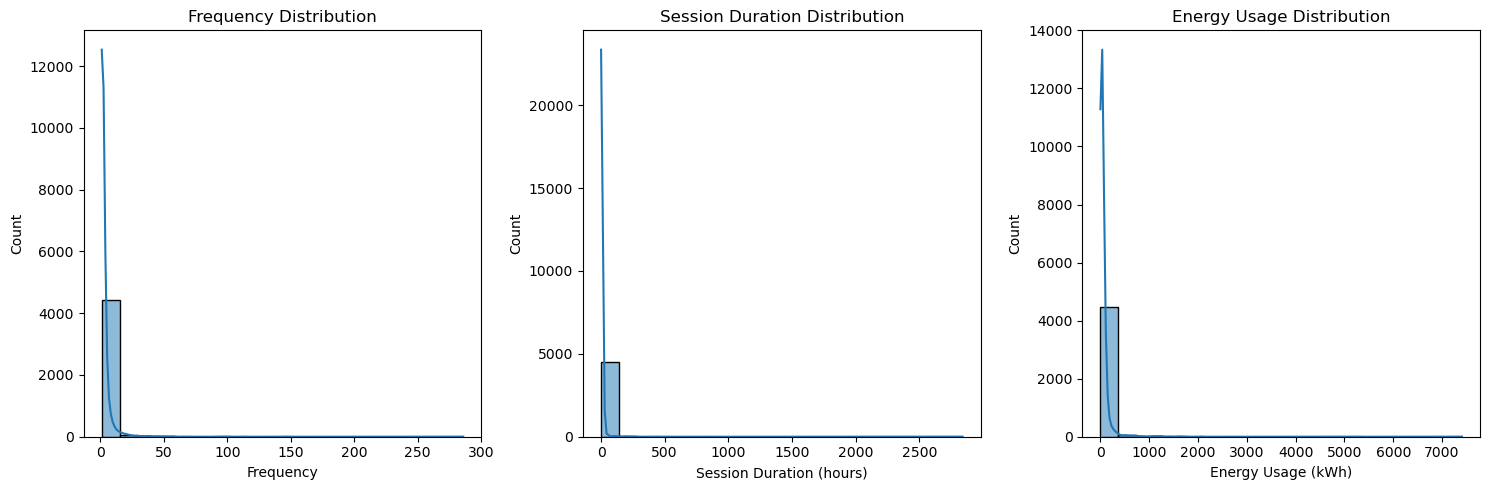

High Usage Customers:
         Frequency  Session Duration (hours)  Energy Usage (kWh)
User ID                                                         
1004721         18                 13.514722             209.431
1020051         10                  4.948889             137.817
1107661          2                  1.852778             119.630
1606011          9                  4.978056             333.882
191327          19                 12.091944             265.965
...            ...                       ...                 ...
631985          37                 13.957222             461.750
720093           3                  8.473889             141.750
856208           5                  4.808611             176.577
922231           2                 15.875556             112.701
956551           5                 16.910278             120.408

[498 rows x 3 columns]


In [28]:


# Analyze frequency, session duration, and energy usage distributions
user_frequency = user_analysis.size()
user_session_duration = user_analysis['Total Duration'].sum()
user_energy_usage = user_analysis['Energy (kWh)'].sum()

# Find the customer with the maximum frequency
max_user_index = user_analysis.size().idxmax()
max_user_frequency = user_analysis.size().max()
print("User ID with Maximum Frequency:", max_user_index)
print("Maximum Frequency:", max_user_frequency)

# Create a new DataFrame for analysis results
customer_analysis = pd.DataFrame({
    'Frequency': user_frequency,
    'Session Duration (hours)': user_session_duration / 3600,  # Convert seconds to hours
    'Energy Usage (kWh)': user_energy_usage
})

# Profile high-usage customers (you can adjust the threshold based on your criteria)
high_usage_threshold = 100  # For example, consider users with total energy usage over 100 kWh as high-usage
high_usage_customers = customer_analysis[customer_analysis['Energy Usage (kWh)'] > high_usage_threshold]

# Plot distributions
plt.figure(figsize=(15, 5))

# Plot Frequency Distribution
plt.subplot(1, 3, 1)
sns.histplot(customer_analysis['Frequency'], bins=20, kde=True)
plt.title('Frequency Distribution')

# Plot Session Duration Distribution
plt.subplot(1, 3, 2)
sns.histplot(customer_analysis['Session Duration (hours)'], bins=20, kde=True)
plt.title('Session Duration Distribution')

# Plot Energy Usage Distribution
plt.subplot(1, 3, 3)
sns.histplot(customer_analysis['Energy Usage (kWh)'], bins=20, kde=True)
plt.title('Energy Usage Distribution')

plt.tight_layout()
plt.show()

# Display information about high-usage customers
print("High Usage Customers:")
print(high_usage_customers)


Maximum frequency: 286
